In [48]:
import numpy as np
from matplotlib import pyplot as plt
import glob
import cv2
from calendar import monthrange
import pandas as pd
import xarray as xr



In [42]:
cameras = ['master_S1145792', 'slave_S1143155']
path = '/Volumes/VISSS_data_HD1/%s_data/mosaic/visss%i_visss_%s/data/'

In [96]:
maxFramesPerDay = 140 * 86400
filesPerDay = 24*12



12096000

# all time

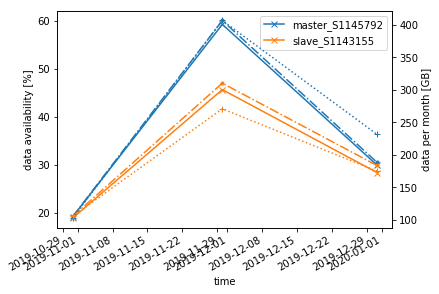

In [109]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

for cc, camera in enumerate(cameras):
    
    dat = xr.open_mfdataset('data_availability/data_availability_%s_*.nc'%(camera))
    
    nFrames = (dat.nFrames[1:].resample(time='1M').sum())
    fSize = ((dat.fileSize[1:].resample(time='1M').sum())/1024)

    nDays = []
    for yy, mm in zip(nFrames['time.year'].values, nFrames['time.month'].values):
        nDays.append(monthrange(yy, mm)[1])
    nDays = np.asarray(nDays)
    nFrames = nFrames/ (maxFramesPerDay* nDays) * 100 
    
    nFiles = (dat.time[1:].notnull().resample(time='1M').sum()/(filesPerDay * nDays)) * 100




    nFrames.plot(ax=ax1, ls='-', marker = 'x', label = camera, color = 'C%i'%cc)
    nFiles.plot(ax=ax1, ls='-.', marker = '.', color = 'C%i'%cc)

    fSize.plot(ax=ax2, ls=':', marker = '+', color = 'C%i'%cc)

    ax1.set_ylabel('data availability [%]')
    ax2.set_ylabel('data per month [GB]')
    
    ax1.legend()
    
    fig.savefig('data_availability/data_availability_all.png')



In [106]:
dat[1:].time.notnull().resample(time='1M').sum()

TypeError: iteration over a 0-d array

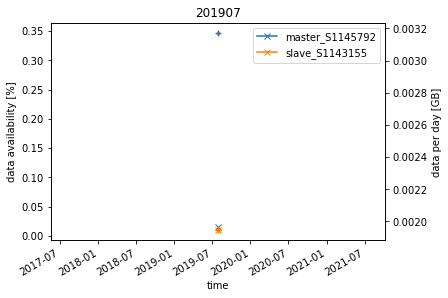

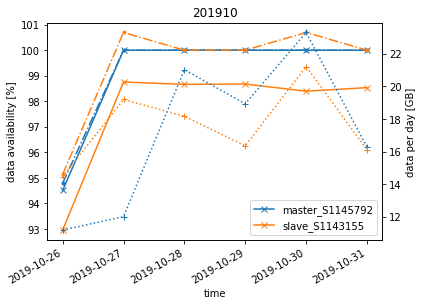

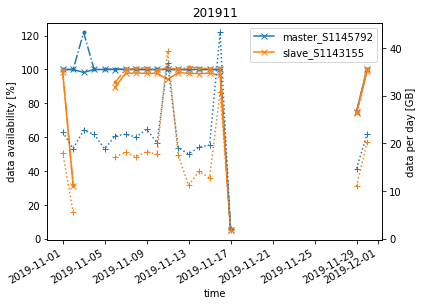

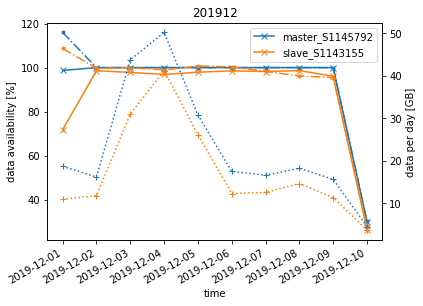

In [113]:
camera1 = cameras[0]
camera2 = cameras[1]

fnames = sorted(glob.glob('data_availability/data_availability_%s_*.nc'%(camera1)))

for fname1 in fnames:
    dat1 = xr.open_dataset(fname1)
    dat2 = xr.open_dataset(fname1.replace(camera1, camera2))
    
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    for cc, dat in enumerate([dat1, dat2]):


        nFrames = (dat.nFrames.resample(time='1D').sum())
        fSize = ((dat.fileSize.resample(time='1D').sum())/1024)

        nFrames = nFrames/ (maxFramesPerDay) * 100 
        nFiles = (dat.time.notnull().resample(time='1D').sum()/filesPerDay) * 100


        nFrames.plot.line(ax=ax1, ls='-', marker = 'x', label = cameras[cc], color = 'C%i'%cc)
        nFiles.plot.line(ax=ax1, ls='-.', marker = '.', color = 'C%i'%cc)

        fSize.plot.line(ax=ax2, ls=':', marker = '+', color = 'C%i'%cc)


        ax1.set_ylabel('data availability [%]')
        ax2.set_ylabel('data per day [GB]')

        ax1.legend()
        
    yearMonth = fname1.split('_')[-1].split('.')[0]
    ax1.set_title(yearMonth)
    ax2.set_title('')

    fig.savefig('data_availability/data_availability_%s.png'%yearMonth)
    

In [102]:
filesPerDay * nDays

array([8928, 8640, 8928])

288

In [87]:
fSize

<xarray.DataArray 'fileSize' (time: 10)>
array([10.880283, 11.747402, 30.94335 , 41.172559, 26.072695, 12.235771,
       12.491494, 14.589209, 11.285439,  3.613525])
Coordinates:
  * time     (time) datetime64[ns] 2019-12-01 2019-12-02 ... 2019-12-10